<a href="https://colab.research.google.com/github/mnsosa/Road-to-TensorFlowDeveloper/blob/main/Introduction_to_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning

# Semana 1

## A new programming paradigm

Son para problemas en donde es dificil poder definir las reglas uno mismo. El algoritmo encuentra los patrones por sí mismo, las reglas que definen el sistema. 

El curso se trata de Deep Learning.

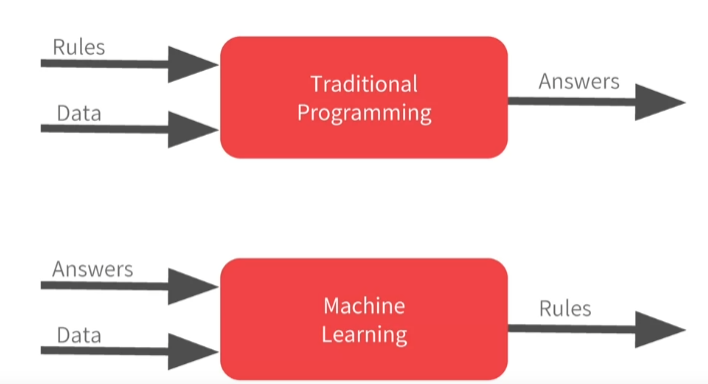

## The ‘Hello World’ of neural networks

Una red neuronal de una neurona. 

Dense es una capa de neuronas conectadas.

Solo hay un valor de entrada.

In [1]:
from tensorflow import keras
import tensorflow as tf

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Mucha de la matemática que necesita el Deep Learning ya está implementado en Keras y TensorFlow. Dos funciones muy importantes son las de loss function and optimizers.

In [2]:
model.compile(optimizer='sgd', loss='mean_squared_error')

En la celda superior se puede ver que se utiliza el optimizador 'sgd', que viene de Stochastic Gradient Descent. 

Se harán datos ejemplos para ver si la red neuronal es capaz de encontrar el patrón entre X e Y.

In [5]:
import numpy as np

xs = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
ys = np.array([-3, -1, 1, 3, 5, 7], dtype=float)

In [8]:
%%capture 
model.fit(xs, ys, epochs=500)

El %%capture es para que no visualice las 500 líneas que se van a querer printear por cada época

In [9]:
model.predict([10])

array([[18.99988]], dtype=float32)

El patrón original es Y = 2*X - 1

Con X = 10, debería dar Y = 19

La red predice un valor muy cercano a 19. Hay pocos datos para que haya encontrado el patrón perfecto, pero lo hace bien igual. 

Recordar que utiliza probabilidades.

### Recursos de la semana 1

- https://www.youtube.com/tensorflow
- http://playground.tensorflow.org/

# Semana 2

## Introduction to Computer Vision


Ahora los modelos tendrán más de una capa. Lo importante es ver la capa de entrada y la capa de salida, en especial ver sus dimensiones. 

In [21]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D
from tensorflow.keras import Sequential
import tensorflow as tf

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

**NOTAR** cómo al modelo se le pasa una LISTA de LAYERS.

Sobre las funciones de activación:

*Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.*

*Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!*

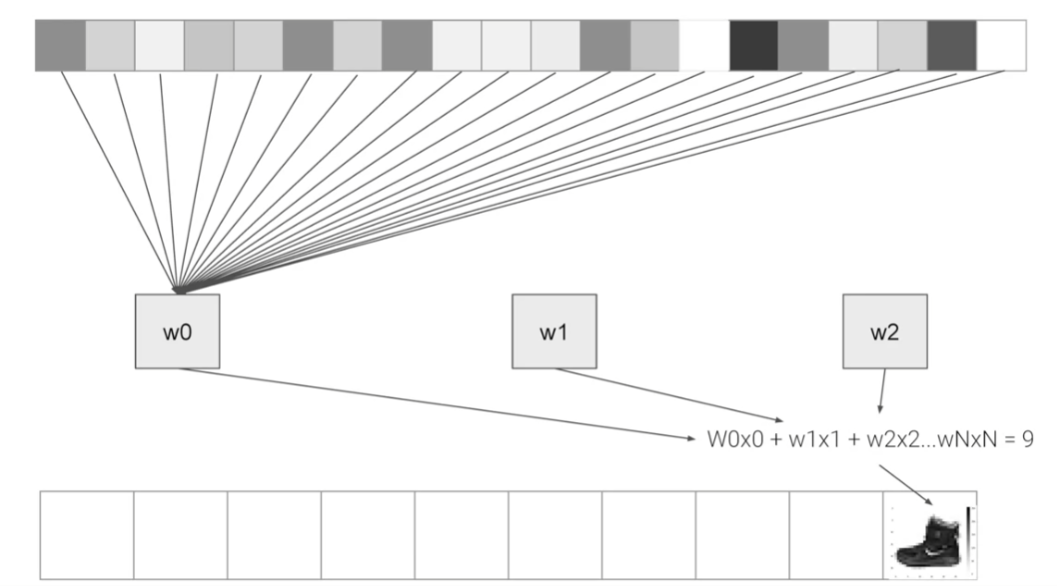

### MNIST

Trae 70mil imágenes el dataset de MNIST Fashion

In [16]:
mnist = tf.keras.datasets.fashion_mnist

In [17]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Notar el linewidth de numpy.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

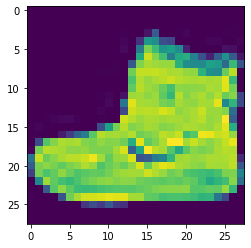

In [18]:
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [19]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [22]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5020 - accuracy: 0.8219
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3774 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8836
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8900


In [24]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8733


[0.3521120548248291, 0.8733000159263611]

Veamos cómo funciona el predict de tf

In [25]:
classifications = model.predict(test_images)

print(classifications[0])

[4.2471188e-06 1.5090177e-07 2.5560071e-08 2.6146332e-10 3.5365210e-07 1.0104151e-04 1.1925393e-06 2.1916030e-02 2.2799466e-05 9.7795415e-01]


Notar que devuelve la probabilidad de que cada etiqueta de ser la correcta. La mayor entonces será la salida de la red.

In [27]:
print(np.argmax(classifications[0]))

9


In [26]:
print(test_labels[0])

9


### Cuando no normalizamos


¿Y qué pasa cuando no normalizamos?

In [29]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0 # Experiment with removing this line
test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2029
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0807
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0530
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0359
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0775
[5.85419251e-08 5.83718922e-08 2.32676825e-06 1.27211199e-04 1.53089676e-11 1.15908865e-08 1.84009041e-09 9.99856830e-01 5.98779707e-07 1.28318106e-05]
7


### Callbacks

Sirve para parar el entrenamiento cuando se alcanza un % deseable.

El ejemplo de abajo, para cuando accuracy llega a 0.6, se stopea el entrenamiento.

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
    # Creo que la última versión de TF usa 'acc' en vez de 'accuracy'
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

#----------------------
callbacks = myCallback()
#----------------------
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
#-----------------------------------------------------^^^^^^^^^^^^^^^^^^^^^^^^

Epoch 1/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.4722 - accuracy: 0.8315
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4721 - accuracy: 0.8316


**NOTAR** que la función de callback que se ejecuta al finalizar una época es *on_epoch_end*

# Semana 3

## Convolución y pooling

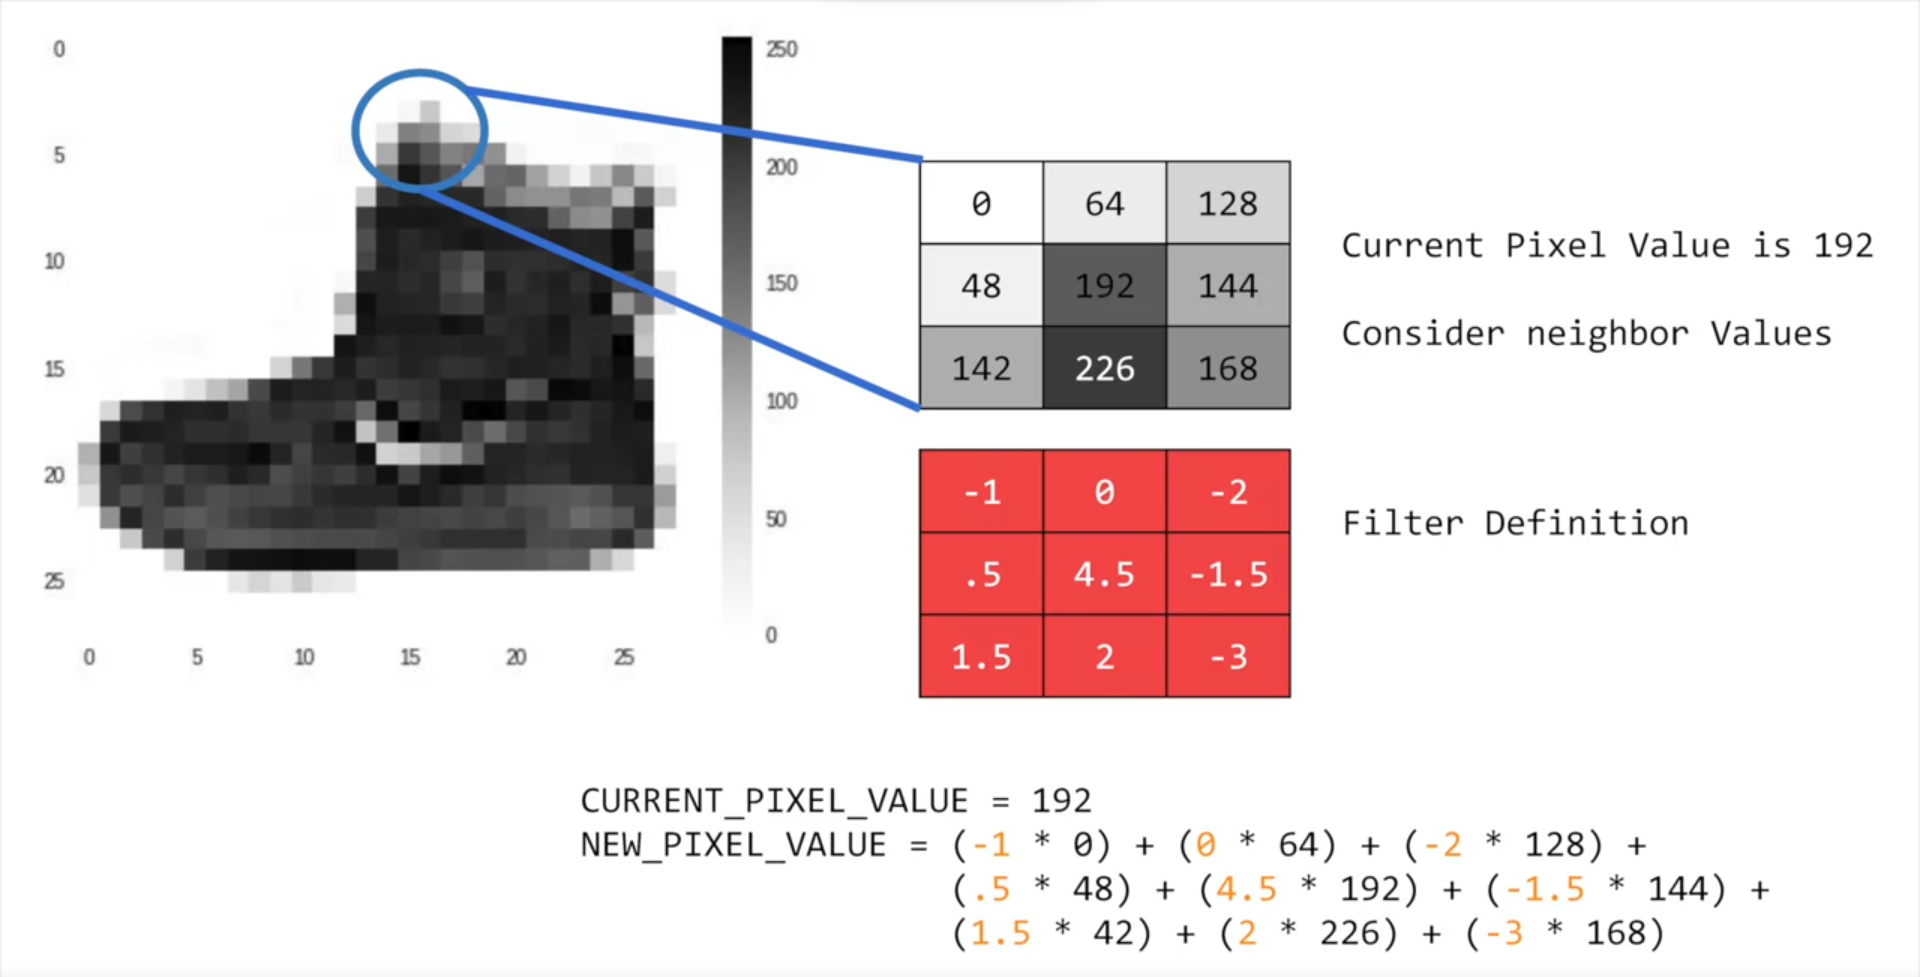

Documentación: 

- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D 

- https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential


In [3]:
model = Sequential([
  # La primer entrada es por 64 filtros de 3x3. 
  # La imagen de entrada es de 28x28 por 1 canal de colores
  Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  # Cada cuatro pixels (por ser 2x2) se toma el valor máximo.
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  # A esta altura, la información ha sida ya dividida por cuatro dos veces.
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Notar la salida de la primera convolucional. Fijarse que es 26x26 porque no puede hacer la convolución en los píxeles extremos porque no tienen vecinos con quién hacerla. 


La salida del max pooling es 13x13 porque reduce los 26x26 a la mitad.

## Visualizar las salidas de las layers

In [5]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.7.0
4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                   

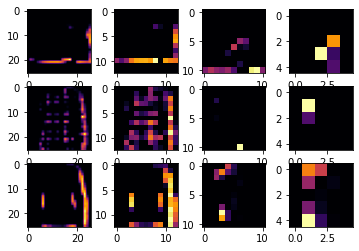

In [7]:
from tensorflow.keras import models
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0, 4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Cada capa se va especializando en la detección de ciertas características que parecen comunes a todas las imágenes pertenecientes a una clase.

## Ejercicios


Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

Remove the final Convolution. What impact will this have on accuracy or training time?

How about adding more Convolutions? What impact do you think this will have? Experiment with it.

Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [8]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1544 - accuracy: 0.9530
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0339 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0158 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0114 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0080 - accuracy: 0.9975
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0068 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0049 - accuracy: 0.9984

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1763 - accuracy: 0.9487
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0615 - accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0394 - accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0267 - accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0193 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0138 - accuracy: 0.9954
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0096 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0086 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0054 - accuracy: 0.9983
Epoch 10/10
313/313 [==============================] - 1s 4ms/ste

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1380 - accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0463 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0295 - accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0187 - accuracy: 0.9936
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0130 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0087 - accuracy: 0.9974
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0082 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0062 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0054 - accuracy: 0.9981
Epoch 10/10
313/313 [==============================] - 2s 7ms/st

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1263 - accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0422 - accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0288 - accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0150 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0111 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0095 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 10/10
313/313 [==============================] - 3s 9ms/st

In [12]:
# Se agregan dos conv2D y MaxPooling2D más.

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

ValueError: ignored

In [13]:
# Se agregan dos conv2D y MaxPooling2D más.

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2006 - accuracy: 0.9366
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0691 - accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0494 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0397 - accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0306 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0246 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0218 - accuracy: 0.9930
Epoch 8/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0179 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 10/10
313/313 [==============================] - 3s 9ms/st

## Recursos de la semana 3

Algoritmos de convolución en:  

https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_2_exploring_convolutions.ipynb

https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%202%20-%20Notebook.ipynb

# Semana 4

## ImageDataGenerator

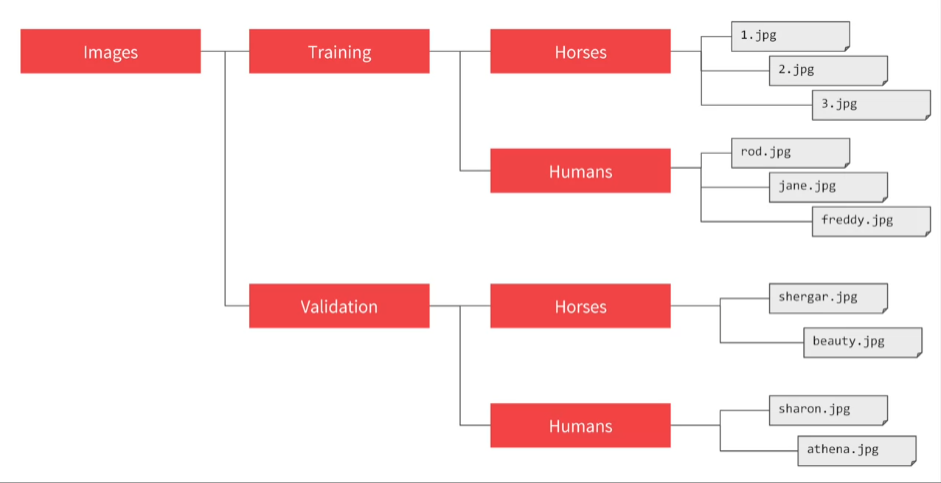

Al organizar de esta forma el directorio, el flow_from_directory de ImageDataGenerator permite subir todas las imágenes y etiquetarlas según la carpeta a la que pertenezca. También se le hace el rescale al mismo tiempo, y se convierte a una imagen cuadrada para poder hacer la convolución. 

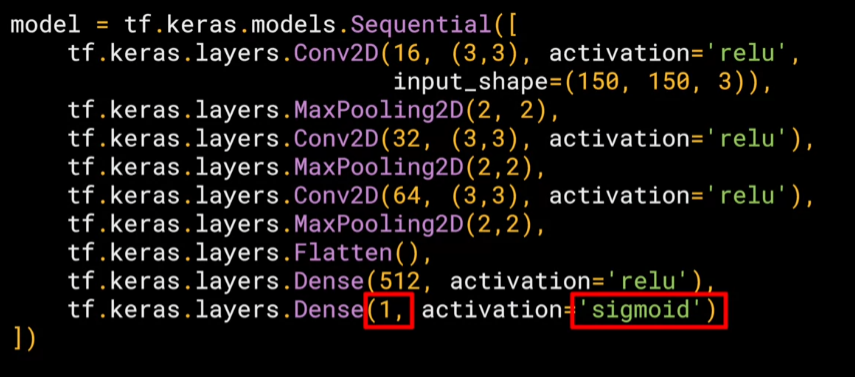

Como se es una clasificación binaria en el ejemplo de caballos vs humanos, al cargarse con ImageDataGenerator se pone class mode binary. También, se utiliza una sola neurona con activación sigmoide, que va de 0 a 1, siendo 0 una clase y 1, la otra. Podría hacerse dos neuronas con softmax, pero para clasificación binaria funciona mejor así.

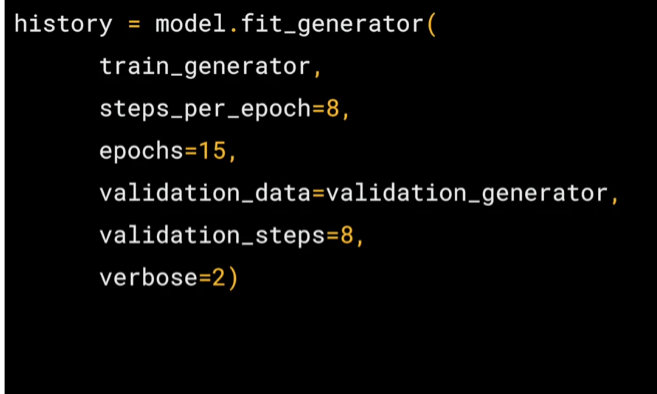

Notar que como se tiene cargado por ImageDataGenerator, se utiliza el **fit_generator** en vez de fit normal. 

Verbose es para indicar qué tanta información y animación mostrar en el entrenamiento de la red.

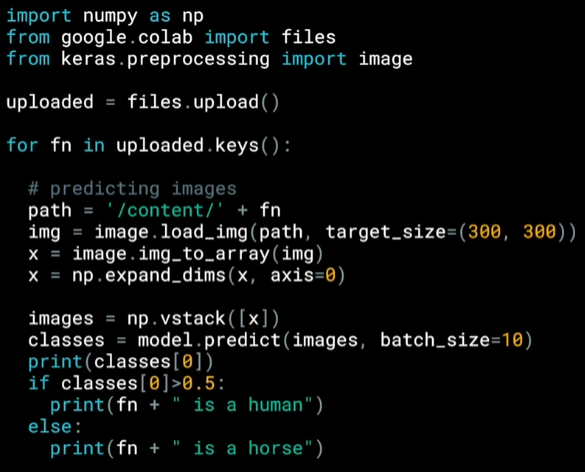

Con el código de la imagen superior se puede hacer predicciones con el modelo.

## Cargar imágenes a la máquina virtual de Google Colab


Se descarga el zip de horse or human.

In [2]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 123MB/s]


Se descomprime el zip con zipfile de python.

In [3]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

Se etiquetan los directorios.



In [4]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

Vemos los nombres de los primeros 10 archivos de cada directorio.

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse08-4.png', 'horse42-4.png', 'horse29-0.png', 'horse27-0.png', 'horse13-4.png', 'horse16-3.png', 'horse45-2.png', 'horse27-5.png', 'horse28-6.png', 'horse05-3.png']
['human15-18.png', 'human13-11.png', 'human09-29.png', 'human07-06.png', 'human12-22.png', 'human07-04.png', 'human12-10.png', 'human04-26.png', 'human15-16.png', 'human17-11.png']


In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Veamos algunas imágenes.


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

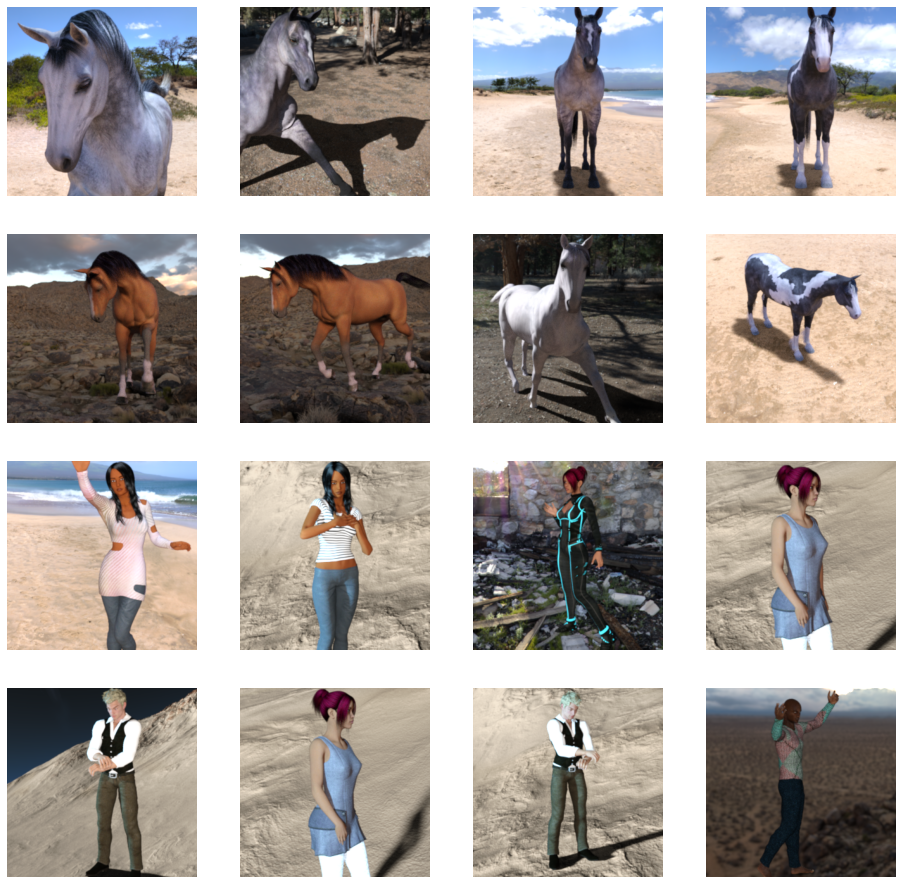

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Construyendo un modelo desde cero


In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 19s 757ms/step - loss: 0.7468 - accuracy: 0.5551
Epoch 2/15
8/8 [==============================] - 7s 800ms/step - loss: 1.4661 - accuracy: 0.6819
Epoch 3/15
8/8 [==============================] - 7s 852ms/step - loss: 0.6069 - accuracy: 0.7164
Epoch 4/15
8/8 [==============================] - 7s 844ms/step - loss: 0.5914 - accuracy: 0.7786
Epoch 5/15
8/8 [==============================] - 7s 836ms/step - loss: 0.3375 - accuracy: 0.8598
Epoch 6/15
8/8 [==============================] - 7s 963ms/step - loss: 0.2749 - accuracy: 0.9121
Epoch 7/15
8/8 [==============================] - 7s 833ms/step - loss: 0.3076 - accuracy: 0.8632
Epoch 8/15
8/8 [==============================] - 7s 844ms/step - loss: 0.0762 - accuracy: 0.9766
Epoch 9/15
8/8 [==============================] - 7s 843ms/step - loss: 0.3464 - accuracy: 0.8932
Epoch 10/15
8/8 [==============================] - 7s 845ms/step - loss: 0.1479 - accuracy: 0.9488
Epoch 11/15
8/8 [=

## ¿Cómo testear de forma manual el modelo?

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving caballo_saltarin_goma.jpg to caballo_saltarin_goma.jpg
Saving caballo_pelo_largo.jpg to caballo_pelo_largo.jpg
Saving caballo4.jpg to caballo4 (1).jpg
Saving caballo3.jpg to caballo3 (1).jpg
Saving caballo2.jpg to caballo2 (1).jpg
Saving caballo.jpg to caballo (2).jpg
[0.]
caballo_saltarin_goma.jpg is a horse
[1.]
caballo_pelo_largo.jpg is a human
[0.]
caballo4.jpg is a horse
[0.]
caballo3.jpg is a horse
[0.]
caballo2.jpg is a horse
[1.]
caballo.jpg is a human
